In [388]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Base Rate (BIS)

In [389]:
US_base = pd.read_csv('USA_base.csv', header=None)
US_base = US_base.rename(columns={0:'Date', 1:'US_base'})

In [390]:
KOR_base = pd.read_csv('KOR_base.csv', header=None)
KOR_base = KOR_base.rename(columns={0:'Date', 1:'KOR_base'})

SPOT

In [391]:
USD_KRW_SPOT = pd.read_csv('USD_KRW_SPOT.txt', header=[0], sep=" ")
USD_KRW_SPOT = USD_KRW_SPOT.rename(columns={'KRW/USD' : 'SPOT'})

FWD

In [392]:
USD_KRW_FWD = pd.read_csv('USD_KRW_FWD.txt', header=None, sep=' ')
USD_KRW_FWD = USD_KRW_FWD.rename(columns={0:'Date', 1:'1week FWD', 2: '1month FWD', 3:'2month FWD', 4:'3month FWD',
                                           5:'6month FWD', 6:'9month FWD', 7:'1year FWD', 8:'2year FWD', 9:'3year FWD'})

my_rate

In [393]:
my_rate = pd.concat([USD_KRW_FWD, USD_KRW_SPOT['SPOT'], US_base['US_base'], KOR_base['KOR_base']], axis=1)

In [394]:
my_rate['Date'] = pd.to_datetime(my_rate['Date'])
selected_dates = my_rate['Date'][my_rate['Date'].dt.month == 1]  # 매년 1
xtick_labels = [date.strftime('%Y-%m') for date in selected_dates]

$$
i = i^{*} + {(F-E)}/{E}
$$

In [395]:
my_rate

,Date,1week FWD,1month FWD,2month FWD,3month FWD,6month FWD,9month FWD,1year FWD,2year FWD,3year FWD,SPOT,US_base,KOR_base
0,2004-01-01,1176.89,1179.62,1183.18,1185.85,1192.48,1197.74,1203.04,1215.00,1216.38,1183.11,1.000,3.75
1,2004-02-01,1176.89,1179.69,1182.27,1184.99,1191.50,1197.00,1202.36,1216.05,1218.26,1166.84,1.000,3.75
2,2004-03-01,1149.04,1151.54,1154.50,1157.44,1164.61,1169.89,1175.09,1190.00,1195.20,1165.66,1.000,3.75
3,2004-04-01,1174.74,1177.20,1180.21,1182.58,1188.28,1191.63,1194.79,1195.96,1189.76,1152.90,1.000,3.75
4,2004-05-01,1163.01,1165.34,1168.21,1170.58,1176.32,1178.82,1180.79,1180.06,1169.32,1176.30,1.000,3.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2023-08-01,1321.36,1319.65,1317.15,1314.97,1316.90,1299.70,1292.50,1276.33,1269.17,1323.66,5.375,3.50
236,2023-09-01,1348.81,1347.02,1344.90,1341.73,1334.21,1326.71,1319.06,1301.86,1292.68,1334.94,5.375,3.50
237,2023-10-01,1350.05,1348.30,1345.70,1343.17,1336.10,1329.57,1323.00,1309.08,1300.68,1350.95,5.375,3.50
238,2023-11-01,1289.50,1287.60,1285.25,1283.20,1276.40,1270.04,1263.76,1249.78,1239.16,1305.18,5.375,3.50


In [396]:
my_rate['Fitted KOR interest rate (1week FWD)'] = my_rate['US_base'] + 100 * (my_rate['1week FWD'] - my_rate['SPOT']) / my_rate['SPOT']
my_rate['Fitted KOR interest rate (1month FWD)'] = my_rate['US_base'] + 100 * (my_rate['1month FWD'] - my_rate['SPOT']) / my_rate['SPOT']
my_rate['Fitted KOR interest rate (2month FWD)'] = my_rate['US_base'] + 100 * (my_rate['2month FWD'] - my_rate['SPOT']) / my_rate['SPOT']
my_rate['Fitted KOR interest rate (3month FWD)'] = my_rate['US_base'] + 100 * (my_rate['3month FWD'] - my_rate['SPOT']) / my_rate['SPOT']
my_rate['Fitted KOR interest rate (6month FWD)'] = my_rate['US_base'] + 100 * (my_rate['6month FWD'] - my_rate['SPOT']) / my_rate['SPOT']
my_rate['Fitted KOR interest rate (9month FWD)'] = my_rate['US_base'] + 100 * (my_rate['9month FWD'] - my_rate['SPOT']) / my_rate['SPOT']
my_rate['Fitted KOR interest rate (1year FWD)'] = my_rate['US_base'] + 100 * (my_rate['1year FWD'] - my_rate['SPOT']) / my_rate['SPOT']
my_rate['Fitted KOR interest rate (2year FWD)'] = my_rate['US_base'] + 100 * (my_rate['2year FWD'] - my_rate['SPOT']) / my_rate['SPOT']
my_rate['Fitted KOR interest rate (3year FWD)'] = my_rate['US_base'] + 100 * (my_rate['3year FWD'] - my_rate['SPOT']) / my_rate['SPOT']

In [397]:
my_rate['Exchange Discount (1week FWD)'] = 100 * (my_rate['1week FWD'] - my_rate['SPOT']) / my_rate['SPOT']
my_rate['Exchange Discount (1month FWD)'] = 100 * (my_rate['1month FWD'] - my_rate['SPOT']) / my_rate['SPOT']
my_rate['Exchange Discount (2month FWD)'] = 100 * (my_rate['2month FWD'] - my_rate['SPOT']) / my_rate['SPOT']
my_rate['Exchange Discount (3month FWD)'] = 100 * (my_rate['3month FWD'] - my_rate['SPOT']) / my_rate['SPOT']
my_rate['Exchange Discount (6month FWD)'] = 100 * (my_rate['6month FWD'] - my_rate['SPOT']) / my_rate['SPOT']
my_rate['Exchange Discount (9month FWD)'] = 100 * (my_rate['9month FWD'] - my_rate['SPOT']) / my_rate['SPOT']
my_rate['Exchange Discount (1year FWD)'] = 100 * (my_rate['1year FWD'] - my_rate['SPOT']) / my_rate['SPOT']
my_rate['Exchange Discount (2year FWD)'] = 100 * (my_rate['2year FWD'] - my_rate['SPOT']) / my_rate['SPOT']
my_rate['Exchange Discount (3year FWD)'] = 100 * (my_rate['3year FWD'] - my_rate['SPOT']) / my_rate['SPOT']

# my_rate['Fitted KOR interest rate (1week FWD) (MA)'] = my_rate['US_base'] + my_rate['Exchange Discount (1week FWD)'].rolling(window=20).mean()
# my_rate['Fitted KOR interest rate (1month FWD) (MA)'] =  my_rate['US_base'] + my_rate['Exchange Discount (1month FWD)'].rolling(window=20).mean()
# my_rate['Fitted KOR interest rate (2month FWD) (MA)'] =  my_rate['US_base'] + my_rate['Exchange Discount (2month FWD)'].rolling(window=20).mean()
# my_rate['Fitted KOR interest rate (3month FWD) (MA)'] =  my_rate['US_base'] + my_rate['Exchange Discount (3month FWD)'].rolling(window=20).mean()
# my_rate['Fitted KOR interest rate (6month FWD) (MA)'] =  my_rate['US_base'] + my_rate['Exchange Discount (6month FWD)'].rolling(window=20).mean()
# my_rate['Fitted KOR interest rate (9month FWD) (MA)'] =  my_rate['US_base'] + my_rate['Exchange Discount (9month FWD)'].rolling(window=20).mean()
# my_rate['Fitted KOR interest rate (1year FWD) (MA)'] = my_rate['US_base'] + my_rate['Exchange Discount (1year FWD)'].rolling(window=20).mean()
# my_rate['Fitted KOR interest rate (2year FWD) (MA)'] = my_rate['US_base'] + my_rate['Exchange Discount (2year FWD)'].rolling(window=20).mean()
# my_rate['Fitted KOR interest rate (3year FWD) (MA)'] = my_rate['US_base'] + my_rate['Exchange Discount (3year FWD)'].rolling(window=20).mean()

In [398]:
my_rate['Fitted KOR interest rate (1week FWD) (MA)'] = my_rate['Fitted KOR interest rate (1week FWD)'].rolling(window=8).mean()
my_rate['Fitted KOR interest rate (1month FWD) (MA)'] = my_rate['Fitted KOR interest rate (1month FWD)'].rolling(window=8).mean()
my_rate['Fitted KOR interest rate (2month FWD) (MA)'] = my_rate['Fitted KOR interest rate (2month FWD)'].rolling(window=8).mean()
my_rate['Fitted KOR interest rate (3month FWD) (MA)'] = my_rate['Fitted KOR interest rate (3month FWD)'].rolling(window=8).mean()
my_rate['Fitted KOR interest rate (6month FWD) (MA)'] = my_rate['Fitted KOR interest rate (6month FWD)'].rolling(window=8).mean()
my_rate['Fitted KOR interest rate (9month FWD) (MA)'] = my_rate['Fitted KOR interest rate (9month FWD)'].rolling(window=8).mean()
my_rate['Fitted KOR interest rate (1year FWD) (MA)'] = my_rate['Fitted KOR interest rate (1year FWD)'].rolling(window=8).mean()
my_rate['Fitted KOR interest rate (2year FWD) (MA)'] = my_rate['Fitted KOR interest rate (2year FWD)'].rolling(window=8).mean()
my_rate['Fitted KOR interest rate (3year FWD) (MA)'] = my_rate['Fitted KOR interest rate (3year FWD)'].rolling(window=8).mean()

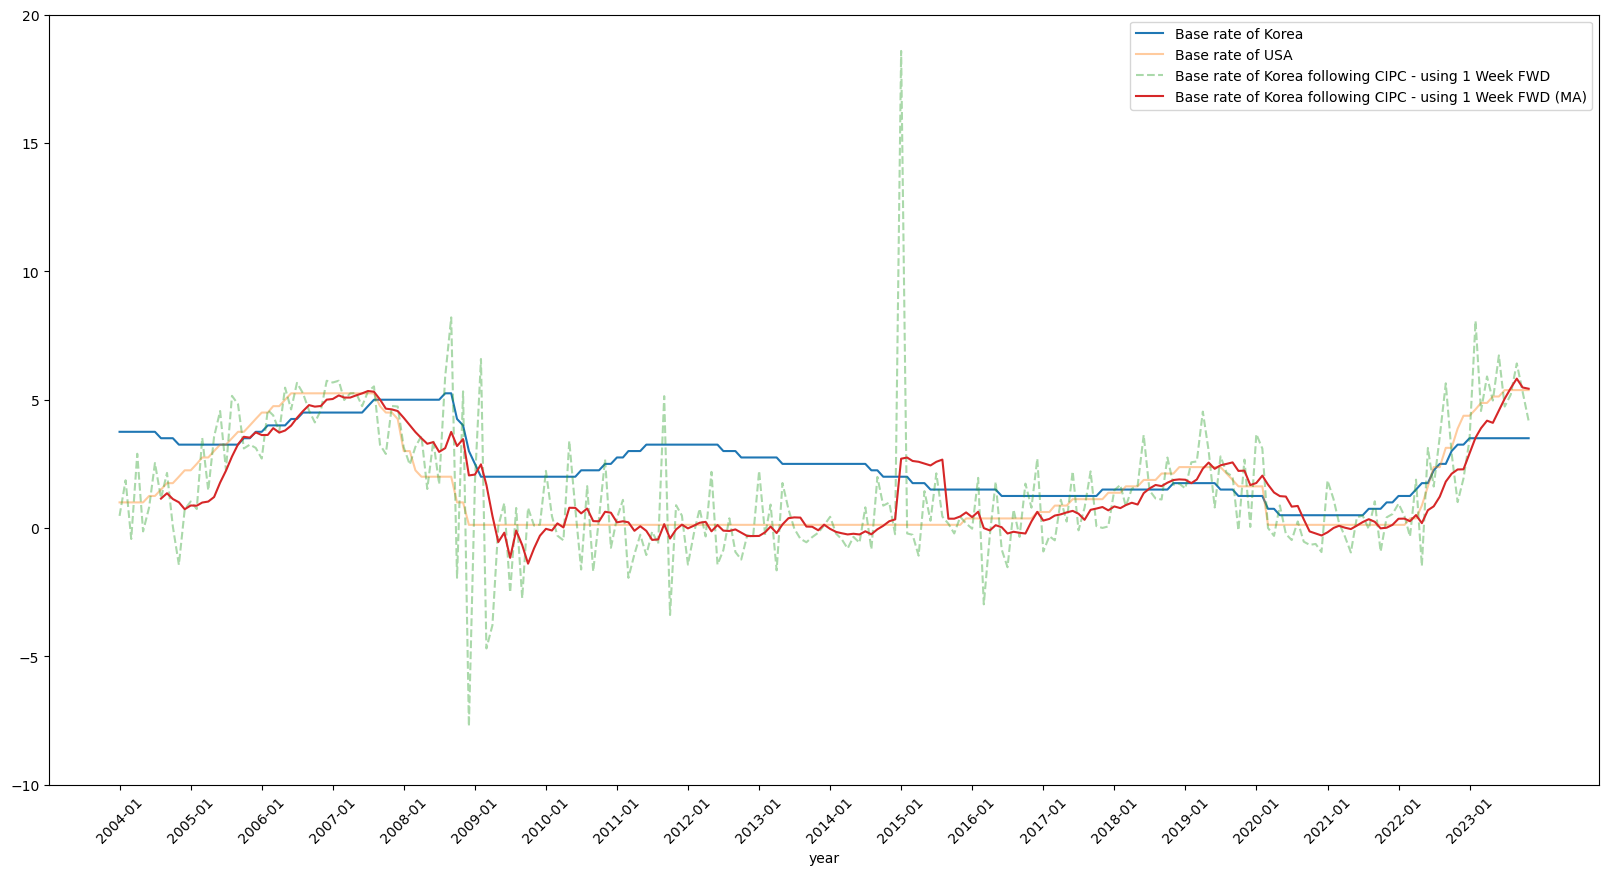

In [399]:
plt.figure(figsize=(20,10))

plt.plot(my_rate['Date'], my_rate['KOR_base'], label = 'Base rate of Korea')
plt.plot(my_rate['Date'], my_rate['US_base'], alpha=0.4, label = 'Base rate of USA')
plt.plot(my_rate['Date'], my_rate['Fitted KOR interest rate (1week FWD)'], alpha=0.4, linestyle = '--', label = 'Base rate of Korea following CIPC - using 1 Week FWD')
plt.plot(my_rate['Date'], my_rate['Fitted KOR interest rate (1week FWD) (MA)'], label = 'Base rate of Korea following CIPC - using 1 Week FWD (MA)')

plt.xticks(ticks=selected_dates, labels=xtick_labels, rotation=45)

plt.legend()
plt.xlabel('year')
plt.ylim([-10,+20])
plt.savefig('Base rate of Korea following CIPC 01- using 1 Week FWD')

plt.show()  

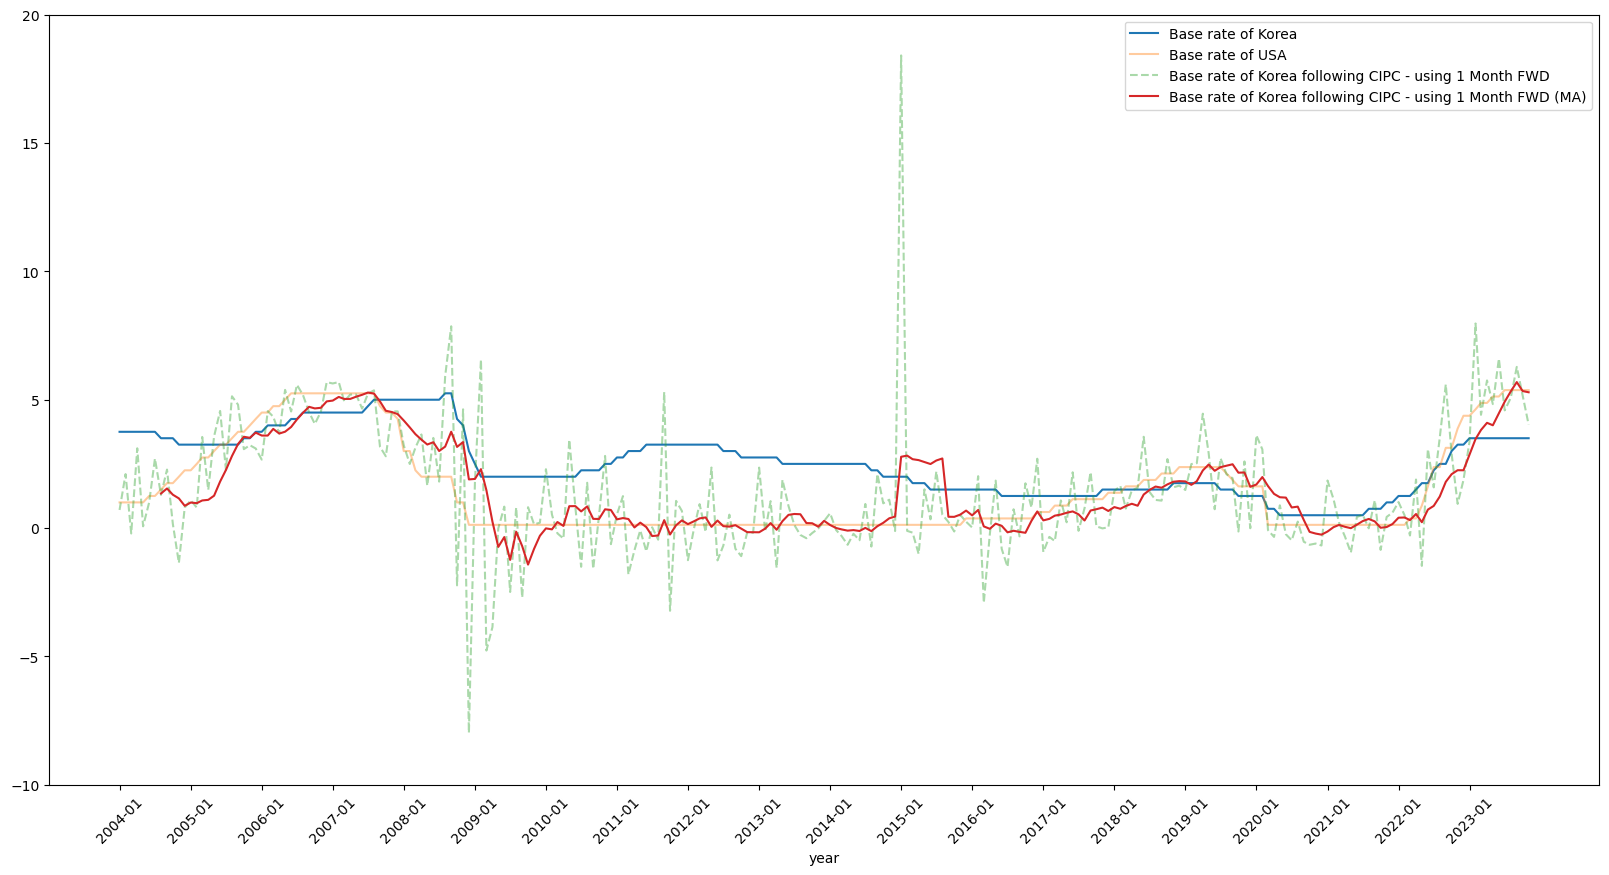

In [400]:
plt.figure(figsize=(20,10))

plt.plot(my_rate['Date'], my_rate['KOR_base'], label = 'Base rate of Korea')
plt.plot(my_rate['Date'], my_rate['US_base'], alpha=0.4, label = 'Base rate of USA')
plt.plot(my_rate['Date'], my_rate['Fitted KOR interest rate (1month FWD)'], alpha=0.4, linestyle='--', label = 'Base rate of Korea following CIPC - using 1 Month FWD')
plt.plot(my_rate['Date'], my_rate['Fitted KOR interest rate (1month FWD) (MA)'], label = 'Base rate of Korea following CIPC - using 1 Month FWD (MA)')

plt.xticks(ticks=selected_dates, labels=xtick_labels, rotation=45)

plt.legend()
plt.xlabel('year')
plt.ylim([-10,+20])
plt.savefig('Base rate of Korea following CIPC 02- using 1 Month FWD')

plt.show()  

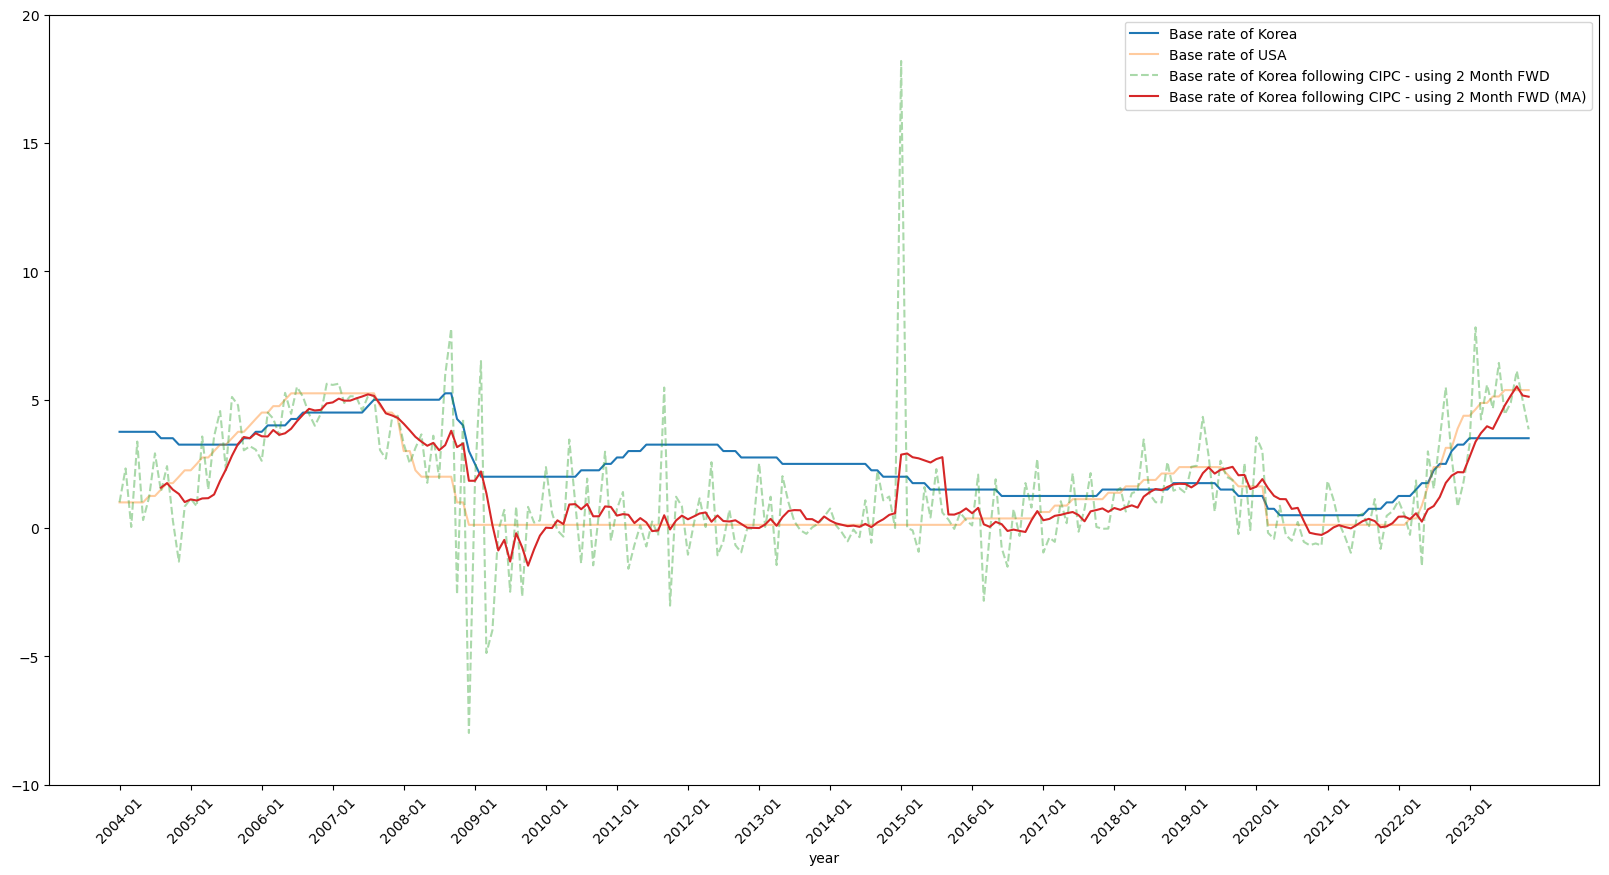

In [401]:
plt.figure(figsize=(20,10))

plt.plot(my_rate['Date'], my_rate['KOR_base'], label = 'Base rate of Korea')
plt.plot(my_rate['Date'], my_rate['US_base'], alpha=0.4, label = 'Base rate of USA')
plt.plot(my_rate['Date'], my_rate['Fitted KOR interest rate (2month FWD)'], alpha=0.4, linestyle='--', label = 'Base rate of Korea following CIPC - using 2 Month FWD')
plt.plot(my_rate['Date'], my_rate['Fitted KOR interest rate (2month FWD) (MA)'], label = 'Base rate of Korea following CIPC - using 2 Month FWD (MA)')

plt.xticks(ticks=selected_dates, labels=xtick_labels, rotation=45)

plt.legend()
plt.xlabel('year')
plt.ylim([-10,+20])
plt.savefig('Base rate of Korea following CIPC 03- using 2 Month FWD')

plt.show()  

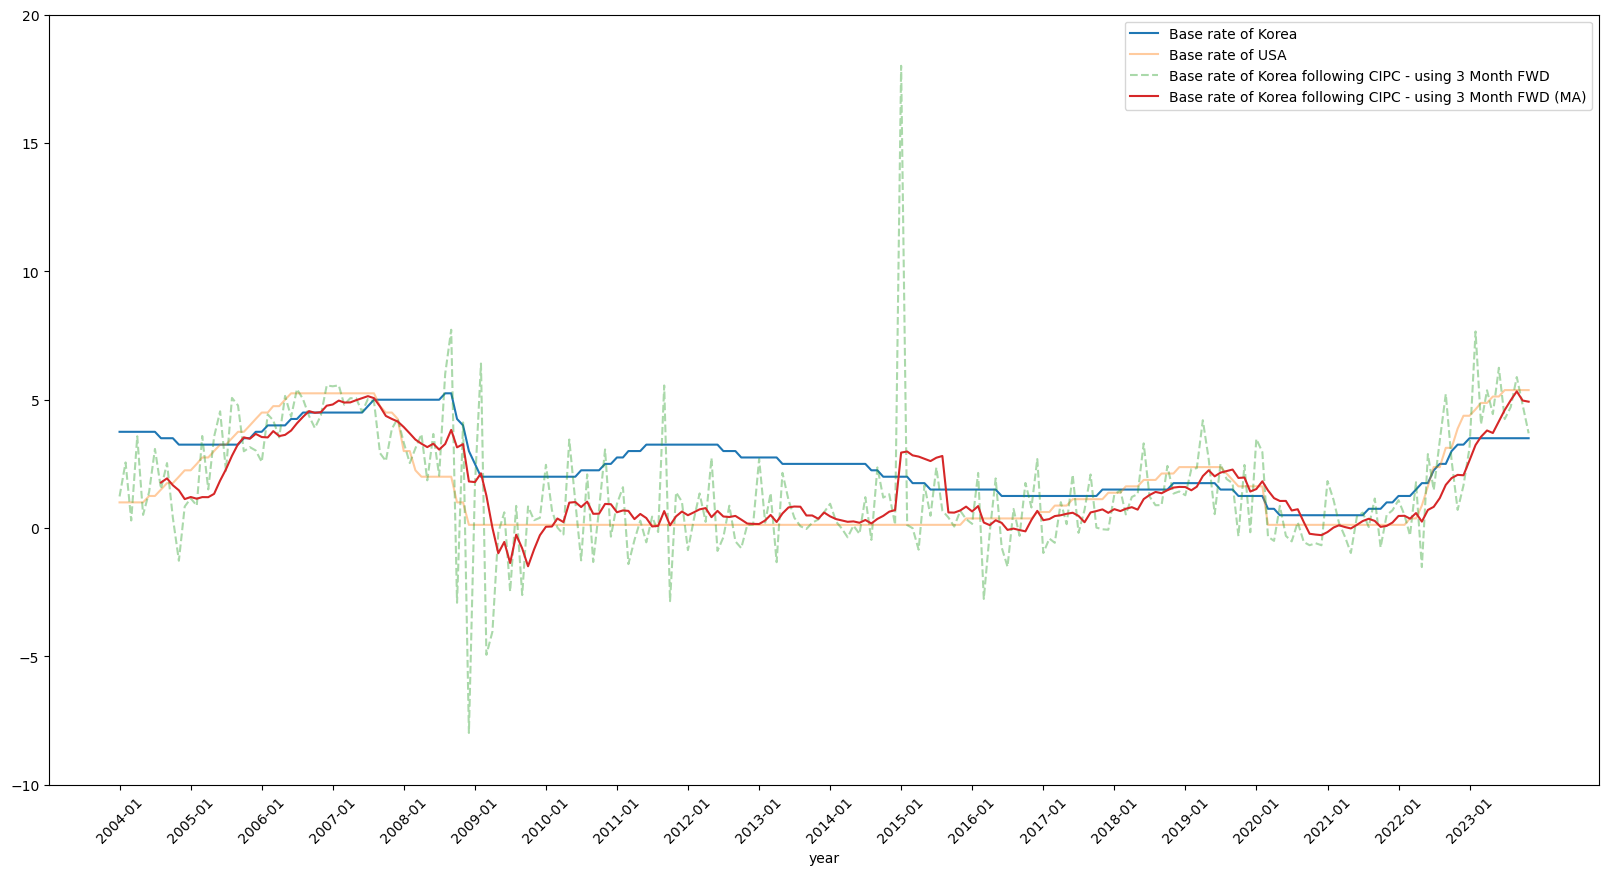

In [402]:
plt.figure(figsize=(20,10))

plt.plot(my_rate['Date'], my_rate['KOR_base'], label = 'Base rate of Korea')
plt.plot(my_rate['Date'], my_rate['US_base'], alpha=0.4, label = 'Base rate of USA')
plt.plot(my_rate['Date'], my_rate['Fitted KOR interest rate (3month FWD)'], alpha=0.4, linestyle='--', label = 'Base rate of Korea following CIPC - using 3 Month FWD')
plt.plot(my_rate['Date'], my_rate['Fitted KOR interest rate (3month FWD) (MA)'], label = 'Base rate of Korea following CIPC - using 3 Month FWD (MA)')

plt.xticks(ticks=selected_dates, labels=xtick_labels, rotation=45)

plt.legend()
plt.xlabel('year')
plt.ylim([-10,+20])
plt.savefig('Base rate of Korea following CIPC 04- using 3 Month FWD')

plt.show()  

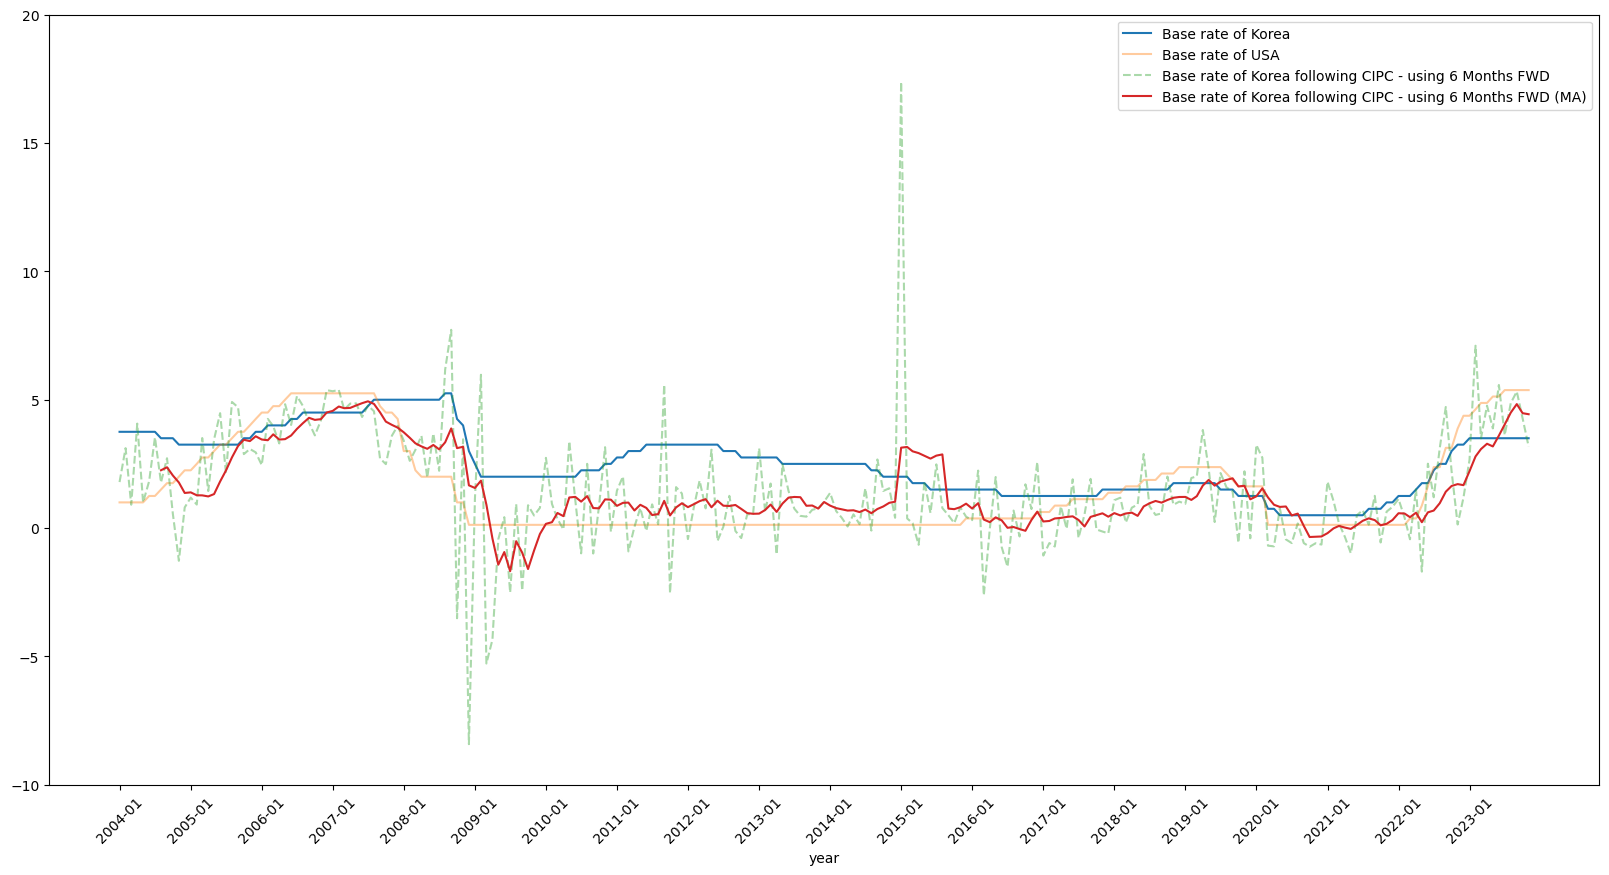

In [403]:
plt.figure(figsize=(20,10))

plt.plot(my_rate['Date'], my_rate['KOR_base'], label = 'Base rate of Korea')
plt.plot(my_rate['Date'], my_rate['US_base'], alpha=0.4, label = 'Base rate of USA')
plt.plot(my_rate['Date'], my_rate['Fitted KOR interest rate (6month FWD)'], alpha=0.4, linestyle='--', label = 'Base rate of Korea following CIPC - using 6 Months FWD')
plt.plot(my_rate['Date'], my_rate['Fitted KOR interest rate (6month FWD) (MA)'], label = 'Base rate of Korea following CIPC - using 6 Months FWD (MA)')

plt.xticks(ticks=selected_dates, labels=xtick_labels, rotation=45)

plt.legend()
plt.xlabel('year')
plt.ylim([-10,+20])
plt.savefig('Base rate of Korea following CIPC 05- using 6 Months FWD')

plt.show()  

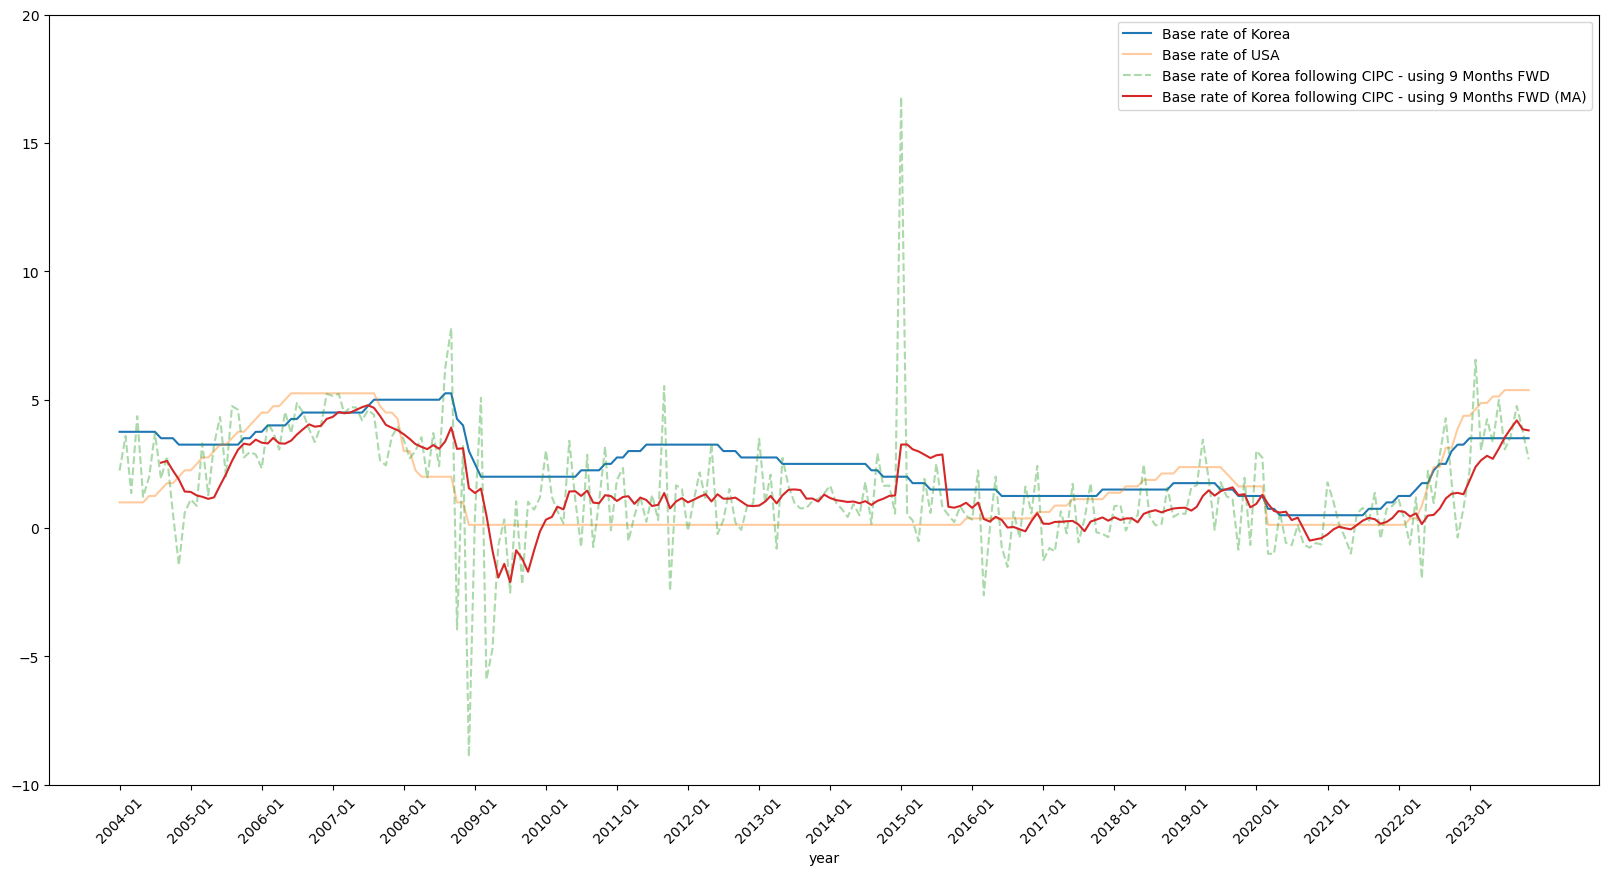

In [404]:
plt.figure(figsize=(20,10))

plt.plot(my_rate['Date'], my_rate['KOR_base'], label = 'Base rate of Korea')
plt.plot(my_rate['Date'], my_rate['US_base'], alpha=0.4, label = 'Base rate of USA')
plt.plot(my_rate['Date'], my_rate['Fitted KOR interest rate (9month FWD)'], alpha=0.4, linestyle='--', label = 'Base rate of Korea following CIPC - using 9 Months FWD')
plt.plot(my_rate['Date'], my_rate['Fitted KOR interest rate (9month FWD) (MA)'], label = 'Base rate of Korea following CIPC - using 9 Months FWD (MA)')

plt.xticks(ticks=selected_dates, labels=xtick_labels, rotation=45)

plt.legend()
plt.xlabel('year')
plt.ylim([-10,+20])
plt.savefig('Base rate of Korea following CIPC 06- using 9 Months FWD')

plt.show()  

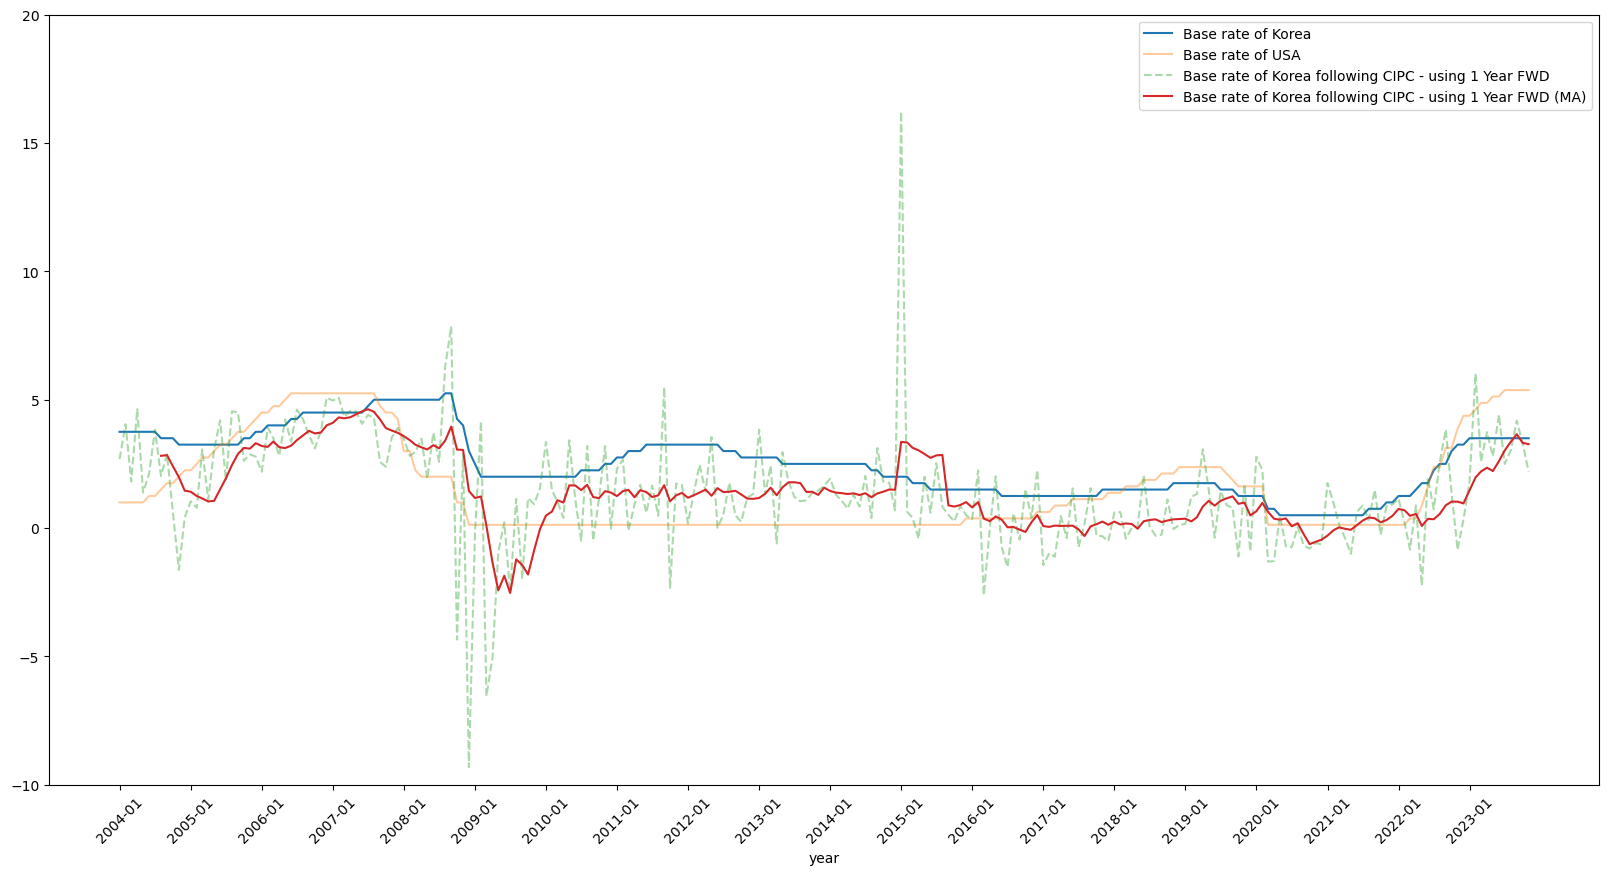

In [405]:
plt.figure(figsize=(20,10))

plt.plot(my_rate['Date'], my_rate['KOR_base'], label = 'Base rate of Korea')
plt.plot(my_rate['Date'], my_rate['US_base'], alpha=0.4, label = 'Base rate of USA')
plt.plot(my_rate['Date'], my_rate['Fitted KOR interest rate (1year FWD)'], alpha=0.4, linestyle='--', label = 'Base rate of Korea following CIPC - using 1 Year FWD')
plt.plot(my_rate['Date'], my_rate['Fitted KOR interest rate (1year FWD) (MA)'], label = 'Base rate of Korea following CIPC - using 1 Year FWD (MA)')

plt.xticks(ticks=selected_dates, labels=xtick_labels, rotation=45)

plt.legend()
plt.xlabel('year')
plt.ylim([-10,+20])
plt.savefig('Base rate of Korea following CIPC 07- using 1 Year FWD')

plt.show()  

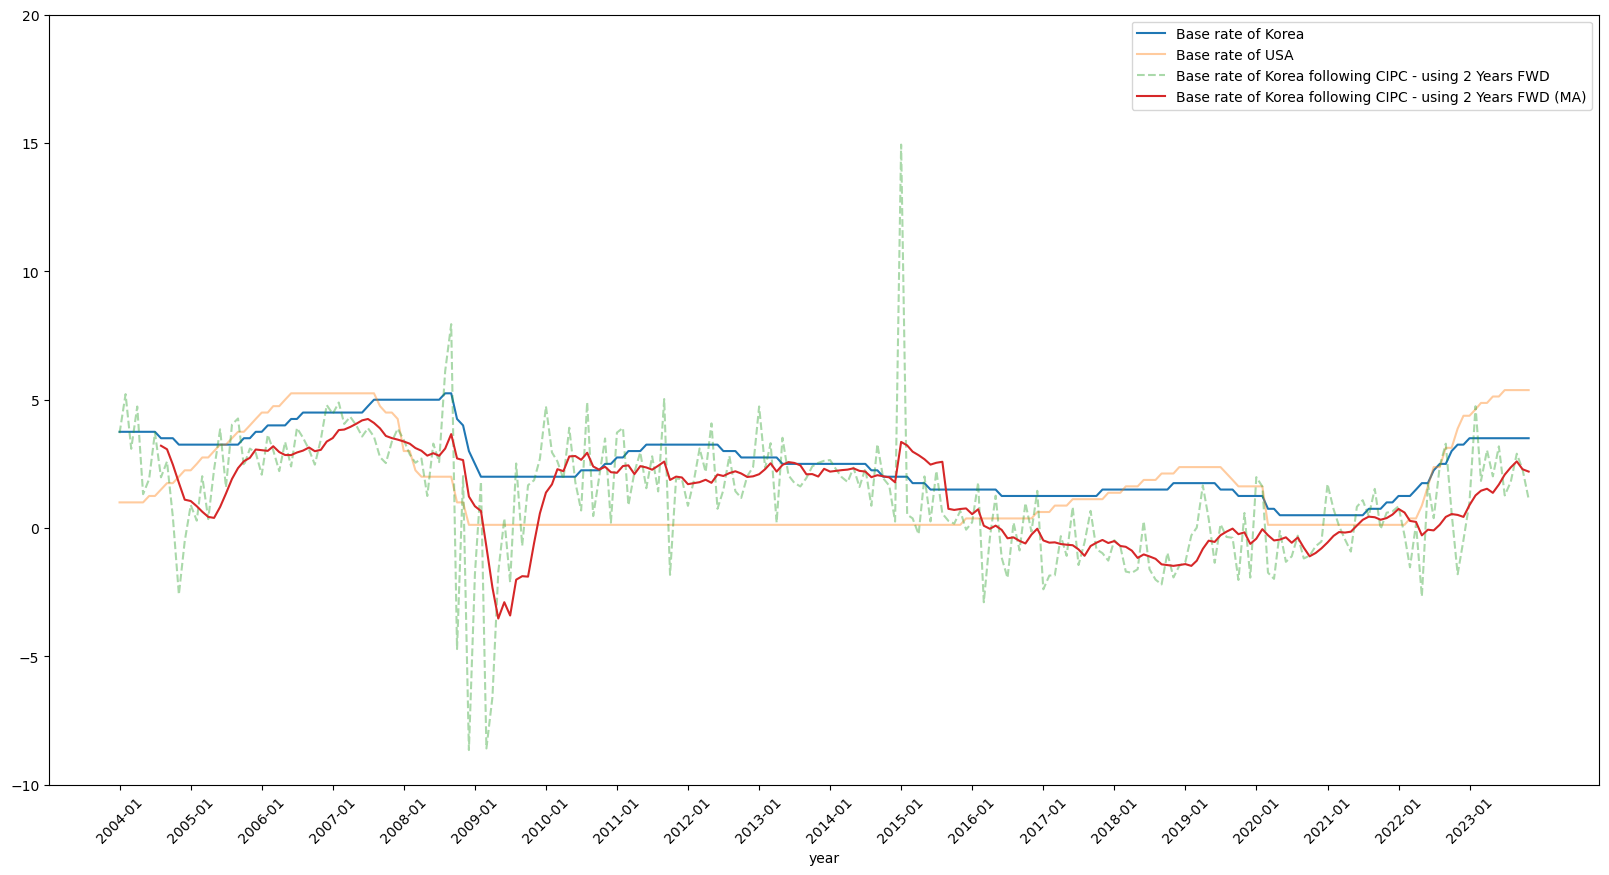

In [406]:
plt.figure(figsize=(20,10))

plt.plot(my_rate['Date'], my_rate['KOR_base'], label = 'Base rate of Korea')
plt.plot(my_rate['Date'], my_rate['US_base'], alpha = 0.4, label = 'Base rate of USA')
plt.plot(my_rate['Date'], my_rate['Fitted KOR interest rate (2year FWD)'], alpha = 0.4, linestyle='--', label = 'Base rate of Korea following CIPC - using 2 Years FWD')
plt.plot(my_rate['Date'], my_rate['Fitted KOR interest rate (2year FWD) (MA)'], label = 'Base rate of Korea following CIPC - using 2 Years FWD (MA)')

plt.xticks(ticks=selected_dates, labels=xtick_labels, rotation=45)

plt.legend()
plt.xlabel('year')
plt.ylim([-10,+20])
plt.savefig('Base rate of Korea following CIPC 08- using 2 Years FWD')

plt.show()  

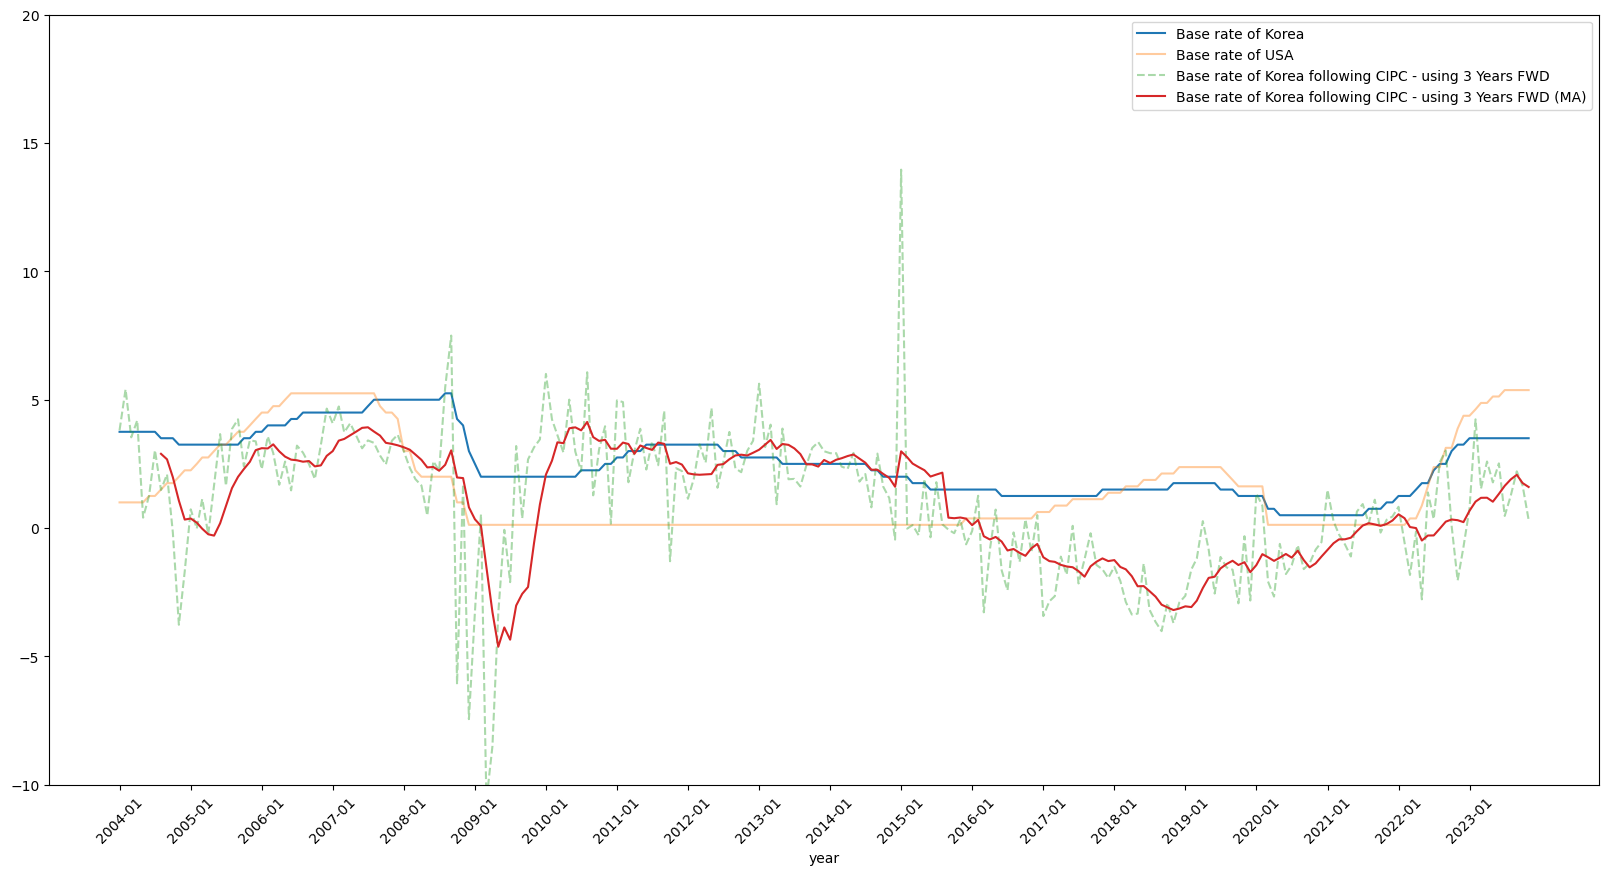

In [407]:
plt.figure(figsize=(20,10))

plt.plot(my_rate['Date'], my_rate['KOR_base'], label = 'Base rate of Korea')
plt.plot(my_rate['Date'], my_rate['US_base'],  alpha=0.4, label = 'Base rate of USA')
plt.plot(my_rate['Date'], my_rate['Fitted KOR interest rate (3year FWD)'], alpha=0.4,  linestyle='--', label = 'Base rate of Korea following CIPC - using 3 Years FWD')
plt.plot(my_rate['Date'], my_rate['Fitted KOR interest rate (3year FWD) (MA)'], label = 'Base rate of Korea following CIPC - using 3 Years FWD (MA)')

plt.xticks(ticks=selected_dates, labels=xtick_labels, rotation=45)

plt.legend()
plt.xlabel('year')
plt.ylim([-10,+20])
plt.savefig('Base rate of Korea following CIPC 09- using 3 Years FWD')

plt.show()  

What we can interpret is..

In [408]:
my_rate['return differential'] = - my_rate['US_base'] + my_rate['KOR_base']

my_rate['Exchange Discount (1week FWD) (MA)'] = my_rate['Exchange Discount (1week FWD)'].rolling(window=4).mean()
my_rate['Exchange Discount (1month FWD) (MA)'] = my_rate['Exchange Discount (1month FWD)'].rolling(window=4).mean()
my_rate['Exchange Discount (2month FWD) (MA)'] = my_rate['Exchange Discount (2month FWD)'].rolling(window=4).mean()
my_rate['Exchange Discount (3month FWD) (MA)'] = my_rate['Exchange Discount (3month FWD)'].rolling(window=4).mean()
my_rate['Exchange Discount (6month FWD) (MA)'] = my_rate['Exchange Discount (6month FWD)'].rolling(window=4).mean()
my_rate['Exchange Discount (9month FWD) (MA)'] = my_rate['Exchange Discount (9month FWD)'].rolling(window=4).mean()
my_rate['Exchange Discount (1year FWD) (MA)'] = my_rate['Exchange Discount (1year FWD)'].rolling(window=4).mean()
my_rate['Exchange Discount (2year FWD) (MA)'] = my_rate['Exchange Discount (2year FWD)'].rolling(window=4).mean()
my_rate['Exchange Discount (3year FWD) (MA)'] = my_rate['Exchange Discount (3year FWD)'].rolling(window=4).mean()

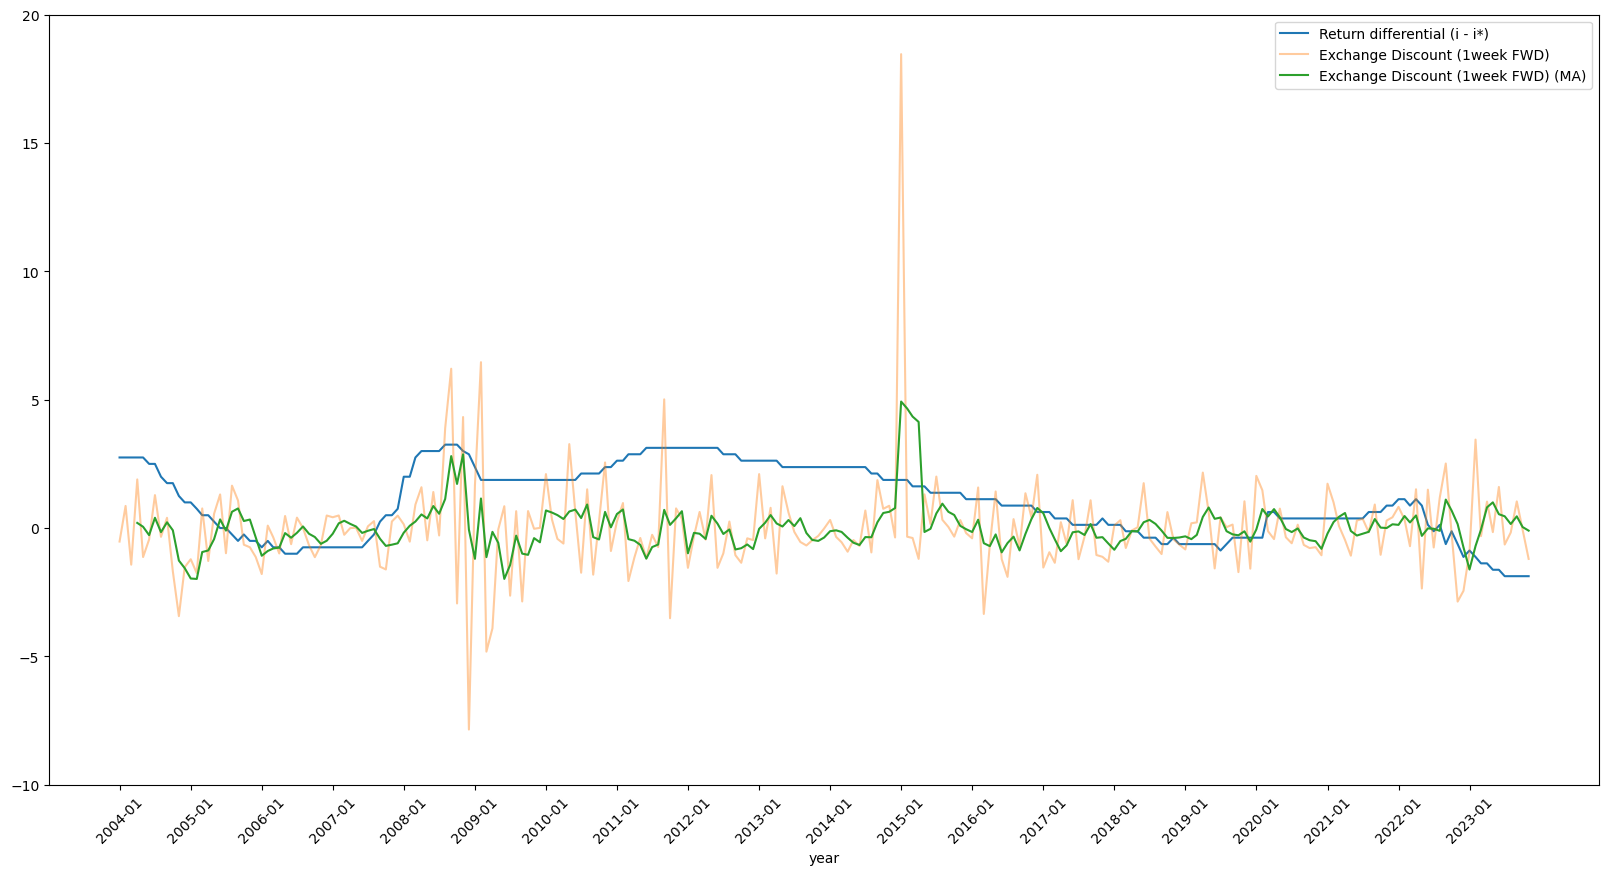

In [409]:
plt.figure(figsize=(20,10))

plt.plot(my_rate['Date'], my_rate['return differential'], label = 'Return differential (i - i*)')
plt.plot(my_rate['Date'], my_rate['Exchange Discount (1week FWD)'], alpha=0.4, label = 'Exchange Discount (1week FWD)')
plt.plot(my_rate['Date'], my_rate['Exchange Discount (1week FWD) (MA)'], label = 'Exchange Discount (1week FWD) (MA)')

plt.xticks(ticks=selected_dates, labels=xtick_labels, rotation=45)

plt.legend()
plt.xlabel('year')
plt.ylim([-10,+20])
plt.savefig('Interest differential and Forward Discount01 (1week FWD)')
plt.show()  

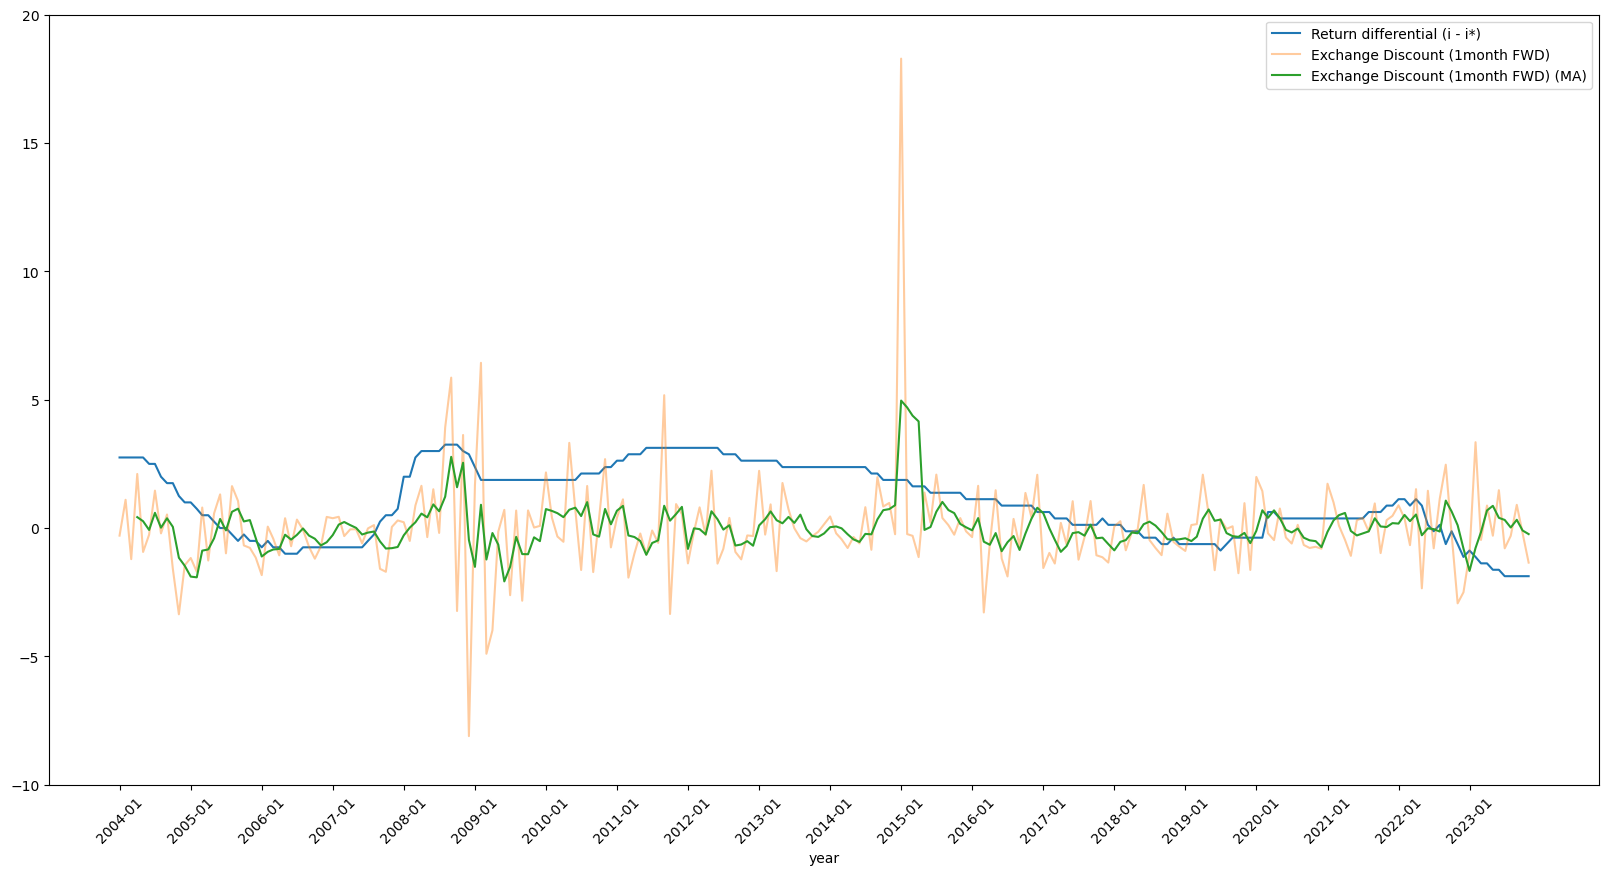

In [410]:
plt.figure(figsize=(20,10))

plt.plot(my_rate['Date'], my_rate['return differential'], label = 'Return differential (i - i*)')
plt.plot(my_rate['Date'], my_rate['Exchange Discount (1month FWD)'], alpha=0.4, label = 'Exchange Discount (1month FWD)')
plt.plot(my_rate['Date'], my_rate['Exchange Discount (1month FWD) (MA)'], label = 'Exchange Discount (1month FWD) (MA)')

plt.xticks(ticks=selected_dates, labels=xtick_labels, rotation=45)

plt.legend()
plt.xlabel('year')
plt.ylim([-10,+20])
plt.savefig('Interest differential and Forward Discount02 (1month FWD)')
plt.show()  

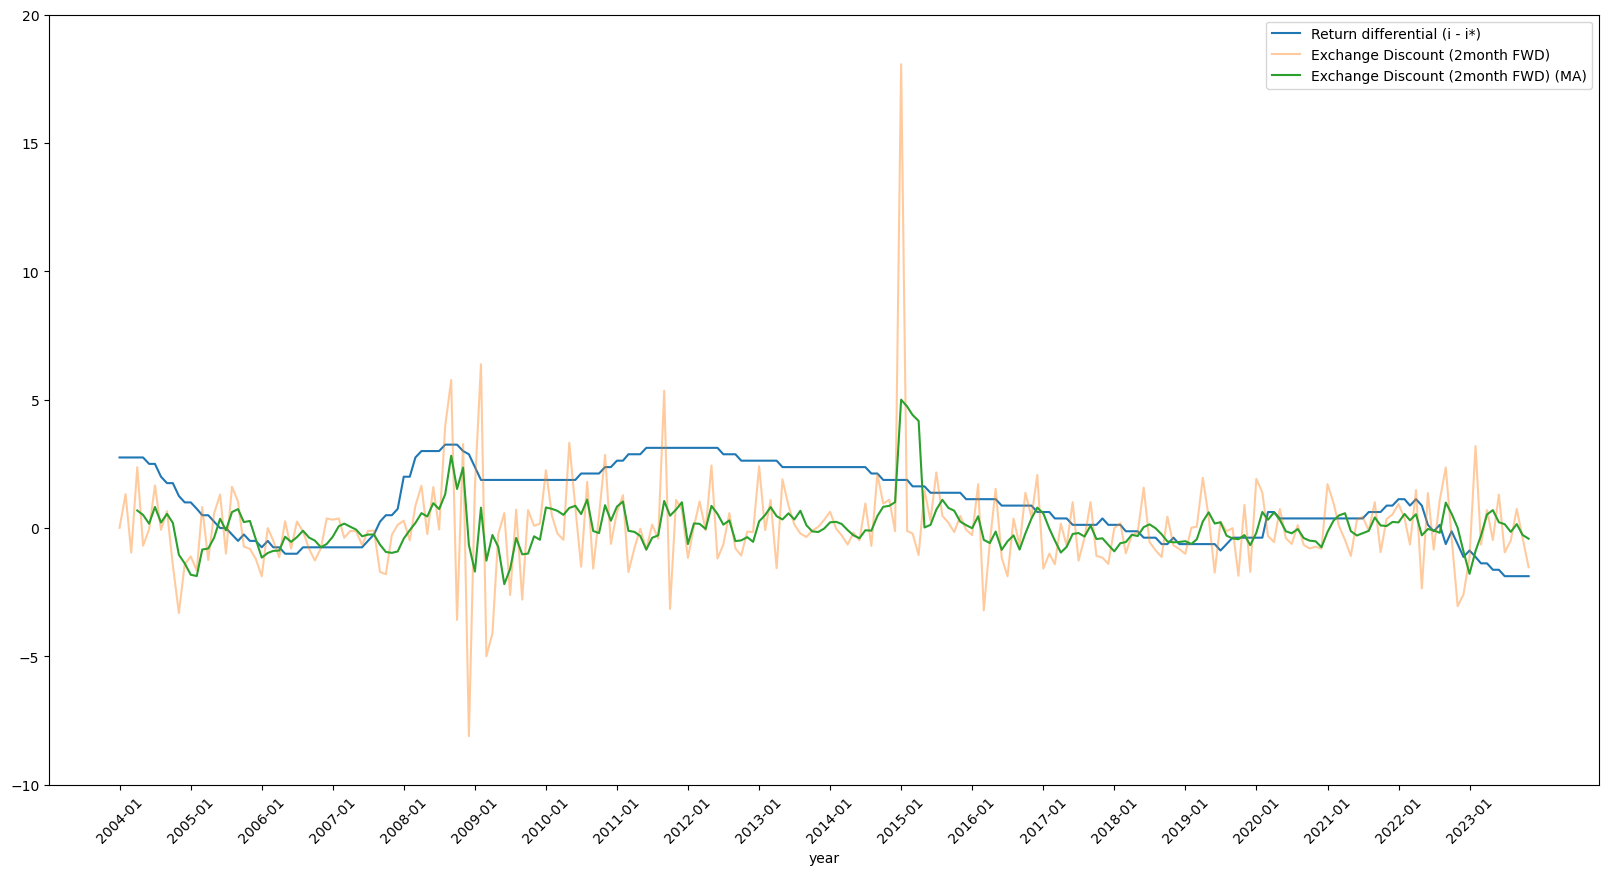

In [411]:
plt.figure(figsize=(20,10))

plt.plot(my_rate['Date'], my_rate['return differential'], label = 'Return differential (i - i*)')
plt.plot(my_rate['Date'], my_rate['Exchange Discount (2month FWD)'], alpha=0.4, label = 'Exchange Discount (2month FWD)')
plt.plot(my_rate['Date'], my_rate['Exchange Discount (2month FWD) (MA)'], label = 'Exchange Discount (2month FWD) (MA)')

plt.xticks(ticks=selected_dates, labels=xtick_labels, rotation=45)

plt.legend()
plt.xlabel('year')
plt.ylim([-10,+20])
plt.savefig('Interest differential and Forward Discount03 (2month FWD)')
plt.show()  

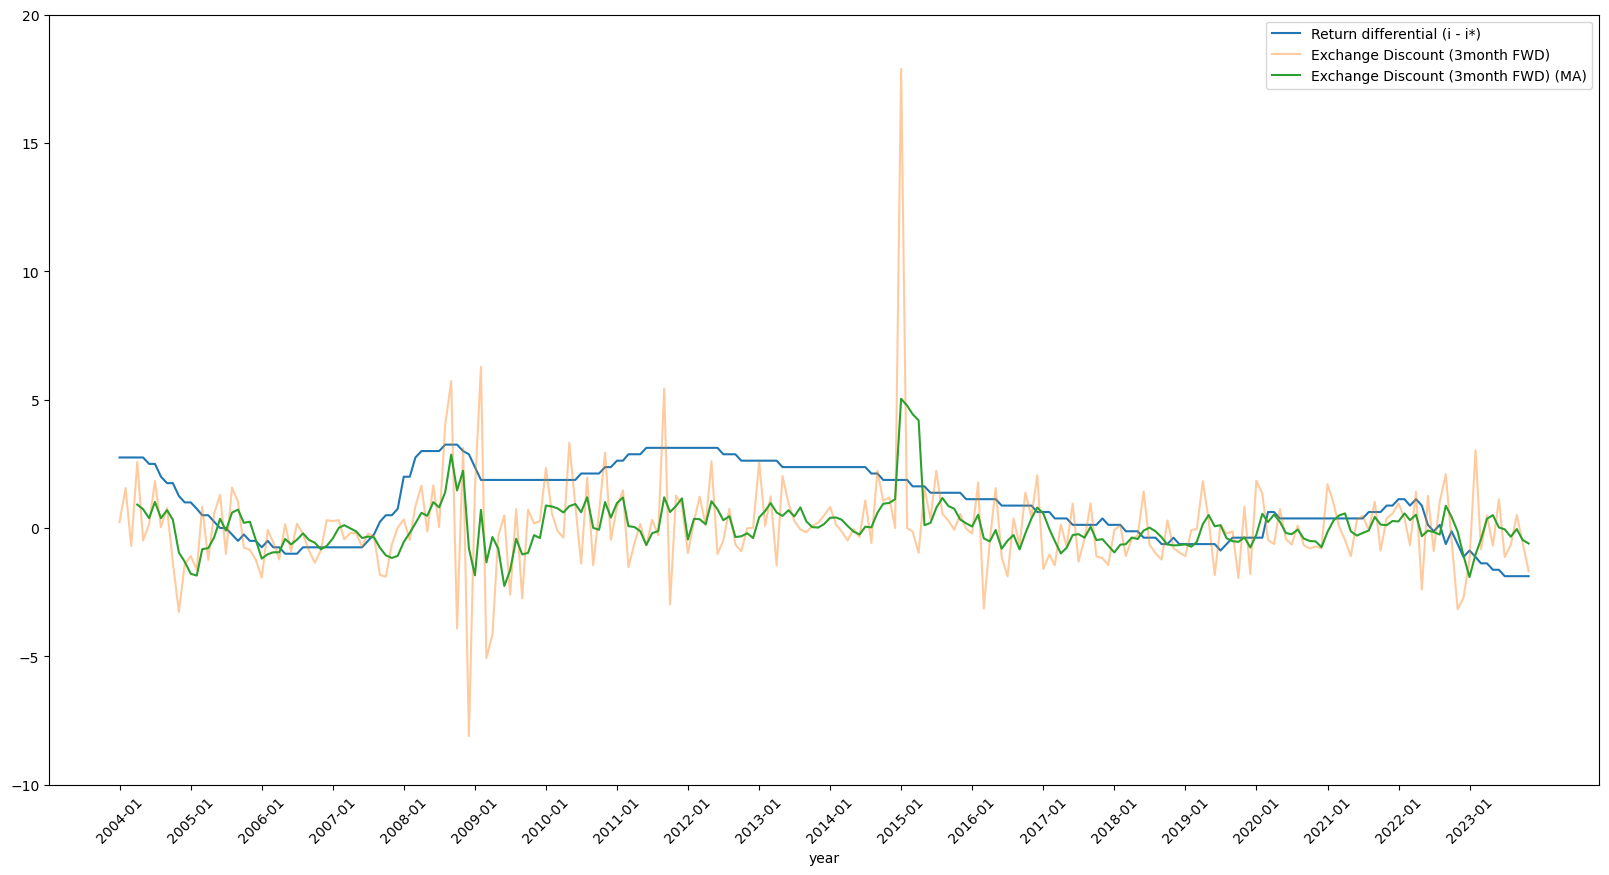

In [412]:
plt.figure(figsize=(20,10))

plt.plot(my_rate['Date'], my_rate['return differential'], label = 'Return differential (i - i*)')
plt.plot(my_rate['Date'], my_rate['Exchange Discount (3month FWD)'], alpha=0.4, label = 'Exchange Discount (3month FWD)')
plt.plot(my_rate['Date'], my_rate['Exchange Discount (3month FWD) (MA)'], label = 'Exchange Discount (3month FWD) (MA)')

plt.xticks(ticks=selected_dates, labels=xtick_labels, rotation=45)

plt.legend()
plt.xlabel('year')
plt.ylim([-10,+20])
plt.savefig('Interest differential and Forward Discount04 (3month FWD)')
plt.show()  

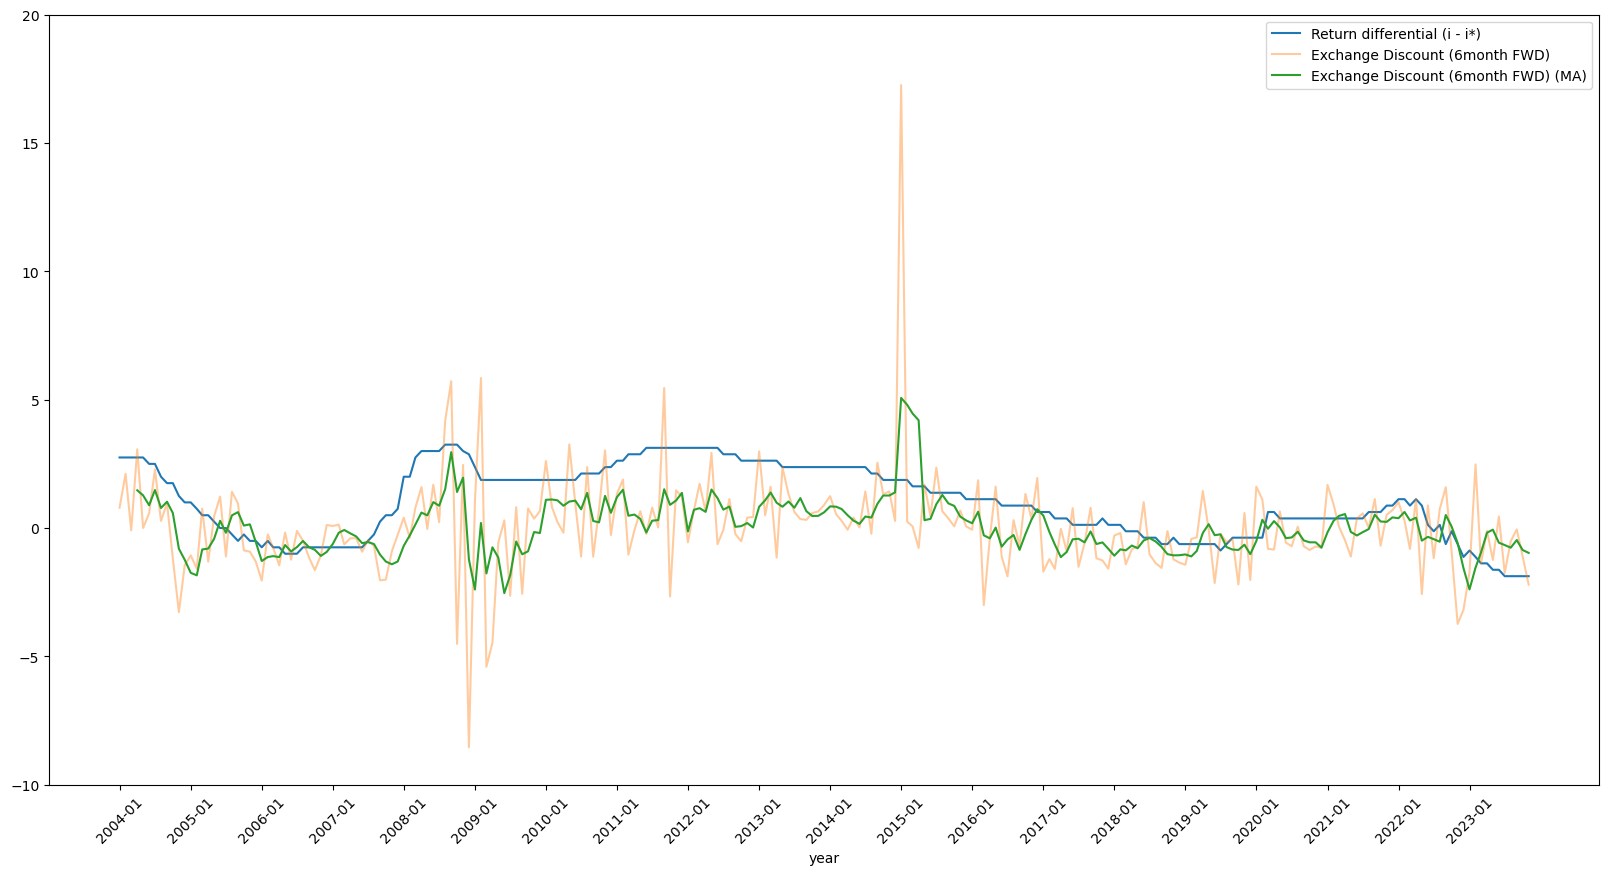

In [413]:
plt.figure(figsize=(20,10))

plt.plot(my_rate['Date'], my_rate['return differential'], label = 'Return differential (i - i*)')
plt.plot(my_rate['Date'], my_rate['Exchange Discount (6month FWD)'], alpha=0.4, label = 'Exchange Discount (6month FWD)')
plt.plot(my_rate['Date'], my_rate['Exchange Discount (6month FWD) (MA)'], label = 'Exchange Discount (6month FWD) (MA)')

plt.xticks(ticks=selected_dates, labels=xtick_labels, rotation=45)

plt.legend()
plt.xlabel('year')
plt.ylim([-10,+20])
plt.savefig('Interest differential and Forward Discount05 (6month FWD)')
plt.show()  

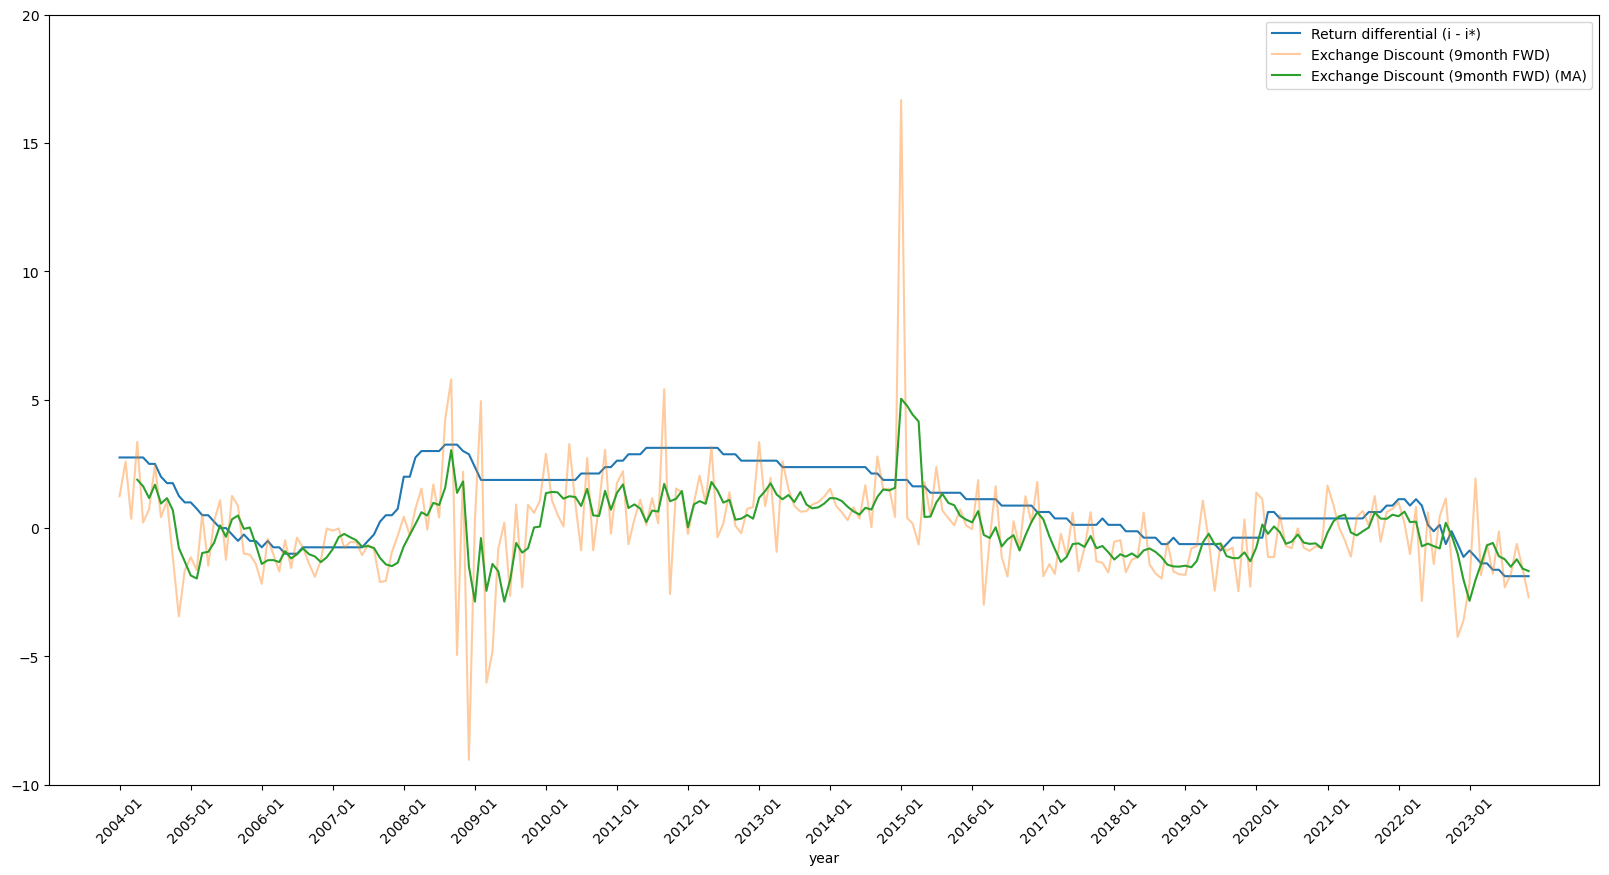

In [414]:
plt.figure(figsize=(20,10))

plt.plot(my_rate['Date'], my_rate['return differential'], label = 'Return differential (i - i*)')
plt.plot(my_rate['Date'], my_rate['Exchange Discount (9month FWD)'], alpha=0.4, label = 'Exchange Discount (9month FWD)')
plt.plot(my_rate['Date'], my_rate['Exchange Discount (9month FWD) (MA)'], label = 'Exchange Discount (9month FWD) (MA)')

plt.xticks(ticks=selected_dates, labels=xtick_labels, rotation=45)

plt.legend()
plt.xlabel('year')
plt.ylim([-10,+20])
plt.savefig('Interest differential and Forward Discount06 (9month FWD)')
plt.show()  

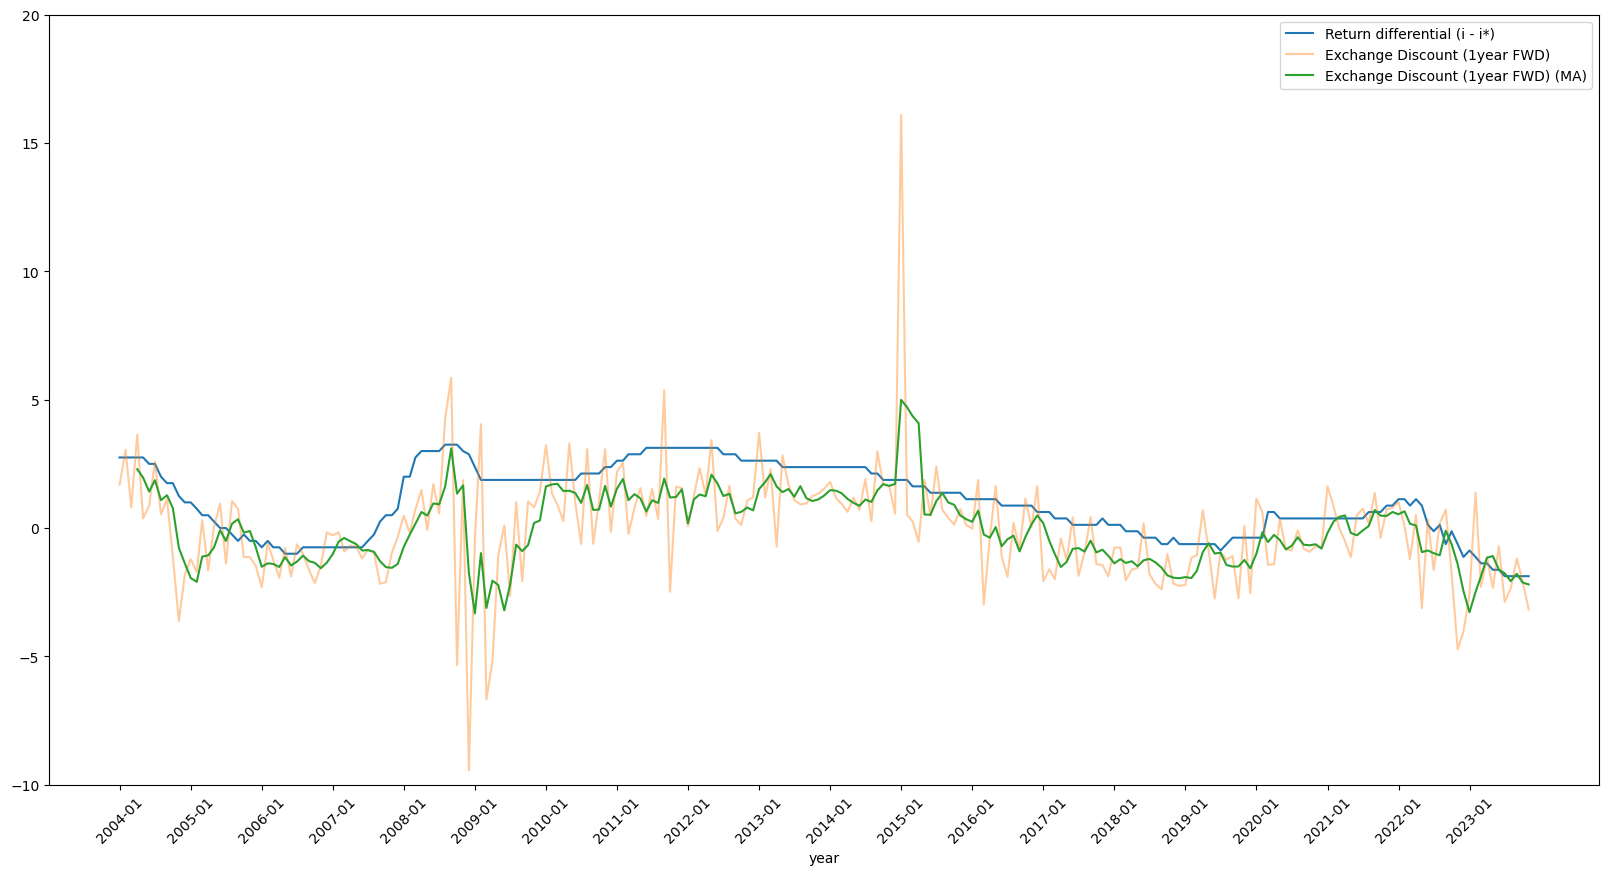

In [415]:
plt.figure(figsize=(20,10))

plt.plot(my_rate['Date'], my_rate['return differential'], label = 'Return differential (i - i*)')
plt.plot(my_rate['Date'], my_rate['Exchange Discount (1year FWD)'], alpha=0.4, label = 'Exchange Discount (1year FWD)')
plt.plot(my_rate['Date'], my_rate['Exchange Discount (1year FWD) (MA)'], label = 'Exchange Discount (1year FWD) (MA)')

plt.xticks(ticks=selected_dates, labels=xtick_labels, rotation=45)

plt.legend()
plt.xlabel('year')
plt.ylim([-10,+20])
plt.savefig('Interest differential and Forward Discount07 (1year FWD)')
plt.show()  

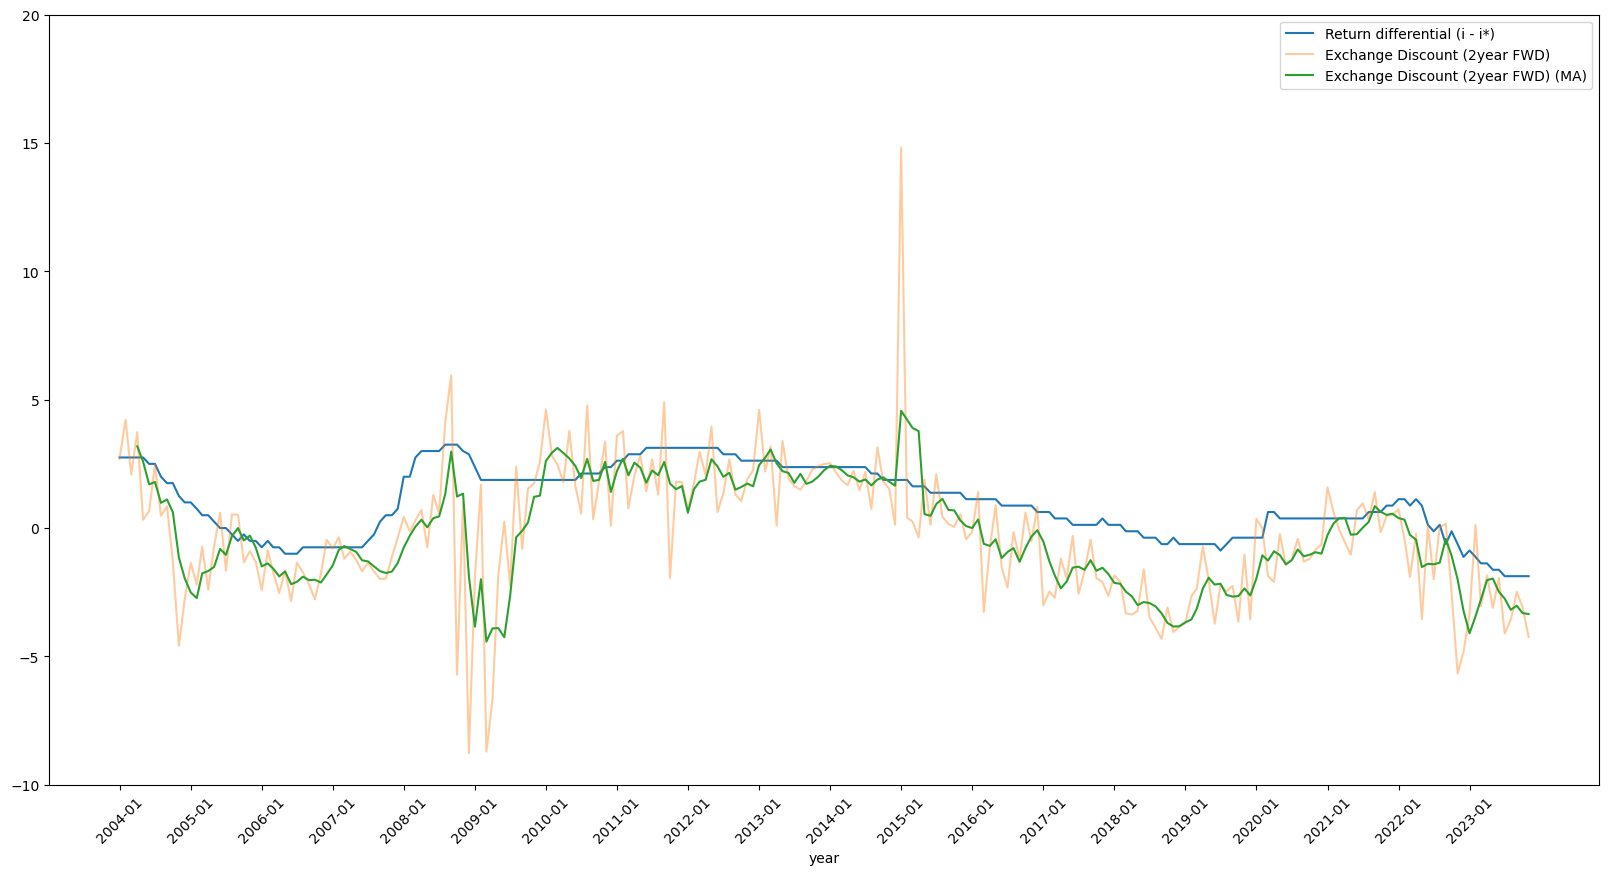

In [416]:
plt.figure(figsize=(20,10))

plt.plot(my_rate['Date'], my_rate['return differential'], label = 'Return differential (i - i*)')
plt.plot(my_rate['Date'], my_rate['Exchange Discount (2year FWD)'], alpha=0.4, label = 'Exchange Discount (2year FWD)')
plt.plot(my_rate['Date'], my_rate['Exchange Discount (2year FWD) (MA)'], label = 'Exchange Discount (2year FWD) (MA)')

plt.xticks(ticks=selected_dates, labels=xtick_labels, rotation=45)

plt.legend()
plt.xlabel('year')
plt.ylim([-10,+20])
plt.savefig('Interest differential and Forward Discount08 (2year FWD)')
plt.show()  

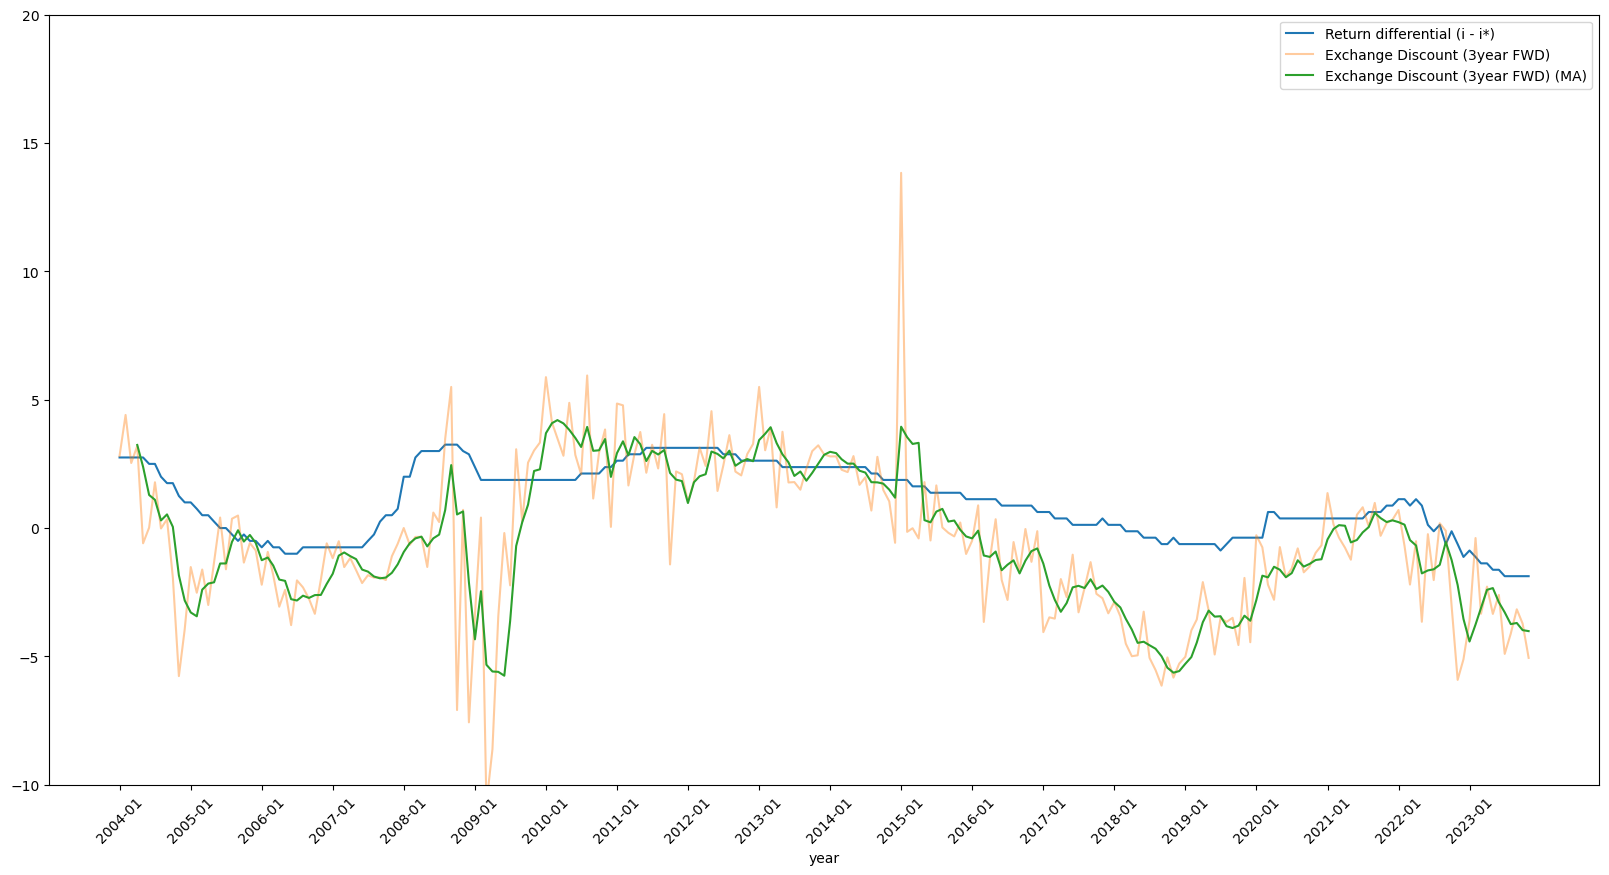

In [417]:
plt.figure(figsize=(20,10))

plt.plot(my_rate['Date'], my_rate['return differential'], label = 'Return differential (i - i*)')
plt.plot(my_rate['Date'], my_rate['Exchange Discount (3year FWD)'], alpha=0.4, label = 'Exchange Discount (3year FWD)')
plt.plot(my_rate['Date'], my_rate['Exchange Discount (3year FWD) (MA)'], label = 'Exchange Discount (3year FWD) (MA)')

plt.xticks(ticks=selected_dates, labels=xtick_labels, rotation=45)

plt.legend()
plt.xlabel('year')
plt.ylim([-10,+20])
plt.savefig('Interest differential and Forward Discount09 (3year FWD)')
plt.show()  